In [1]:
import pandas as pd
import numpy as np
import glob
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
file_paths = ['PitcherY_Pitch1.csv', 'PitcherY_Pitch2.csv', 'PitcherY_Pitch3.csv', 
'PitcherY_Pitch4.csv', 'PitcherY_Pitch5.csv','PitcherY_Pitch6.csv']

In [3]:
dataframes = [pd.read_csv(file_path)
for file_path in file_paths]

In [114]:
max_frames1 = max(len(df1) for df1 in dataframes)

new_timebase = pd.Series(range(max_frames1)) / (max_frames1 -1)

In [88]:
interpolated_df1 = []
for df1 in dataframes:
    if 'time' in df1.columns and 'right_elbow_flexion' in df1.columns:
        time_column = df1['time']
        elbow_flexion_column = df1['right_elbow_flexion']
        normalized_time = (time_column - time_column.min()) / (time_column.max() - time_column.min())
        interpolated_elbow_flexion = pd.Series(elbow_flexion_column).interpolate(method = 'linear')

interpolated_df1.append(pd.DataFrame({'time': normalized_time, 'elbow_flexion': interpolated_elbow_flexion}))    

In [ ]:
merged_df1 = pd.concat(interpolated_df1, ignore_index = True)
merged_df1

In [91]:
merged_df1.to_csv('brfcef.csv')

In [92]:
x=0
y=199
merged_df1.loc[x:y]
merged_df1.loc[x:y].index
merged_df1.drop(merged_df1.loc[x:y].index, inplace=True)

x=571
y=1216
merged_df1.loc[x:y]
merged_df1.loc[x:y].index
merged_df1.drop(merged_df1.loc[x:y].index, inplace=True)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

normalized_df = merged_df1.copy()
  
column = 'time'
normalized_df[column] = MinMaxScaler().fit_transform(np.array(normalized_df[column]).reshape(-1,1))
   
display(normalized_df)

In [61]:
normalized_df.to_csv('normalized_df.csv')

In [94]:
average_elbow_flexion = normalized_df.groupby('time')['elbow_flexion'].mean()

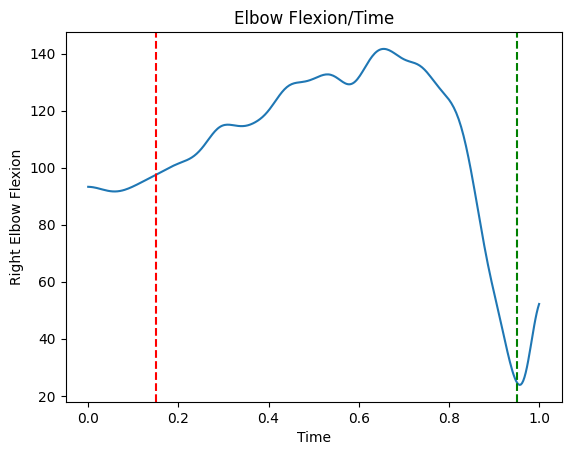

In [95]:
plt.plot(average_elbow_flexion.index, average_elbow_flexion.values)

plt.axvline(x = 0.15, color = 'red', linestyle = '--', label = 'Foot Plant')
plt.axvline(x = 0.95, color = 'green', linestyle = '--', label = 'Ball Release')
plt.xlabel('Time')
plt.ylabel('Right Elbow Flexion')
plt.title('Elbow Flexion/Time')
plt.show()

In [102]:
max_frames2 = max(len(df2) for df2 in dataframes)

new_timebase2 = pd.Series(range(max_frames2)) / (max_frames2 -1)

In [150]:
interpolated_df2 = []
for df2 in dataframes:
    if 'right_knee_internal_rotation' in df2.columns and 'left_knee_extension' in df2.columns:
        knee_internal_rotaion_column = df2['right_knee_internal_rotation']
        knee_extension_column = df2['left_knee_extension']
        interpolated_knee_rotation = pd.Series(knee_internal_rotaion_column).interpolate(method = 'linear')
        interpolated_knee_extension = pd.Series(knee_extension_column).interpolate(method = 'linear')
interpolated_df2.append(pd.DataFrame({'right_knee_internal_rotation': interpolated_knee_rotation, 'left_knee_extension': interpolated_knee_extension}))

In [151]:
merged_df2 = pd.concat(interpolated_df2, ignore_index = True)
merged_df2

,right_knee_internal_rotation,left_knee_extension
0,-20.419453,-22.552941
1,-19.694232,-22.778089
2,-18.969750,-23.006366
3,-18.249680,-23.241028
4,-17.537673,-23.485257
...,...,...
1210,-30.056278,-29.775360
1211,-29.850661,-30.588438
1212,-29.645364,-31.410650
1213,-29.439715,-32.239098


In [ ]:
x=0
y=199
merged_df2.loc[x:y]
merged_df2.loc[x:y].index
merged_df2.drop(merged_df1.loc[x:y].index, inplace=True)

x=571
y=1216
merged_df2.loc[x:y]
merged_df2.loc[x:y].index
merged_df2.drop(merged_df2.loc[x:y].index, inplace=True)
merged_df2

In [156]:
merged_df2.to_csv('merged_df2.csv')

c:\Users\Logan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


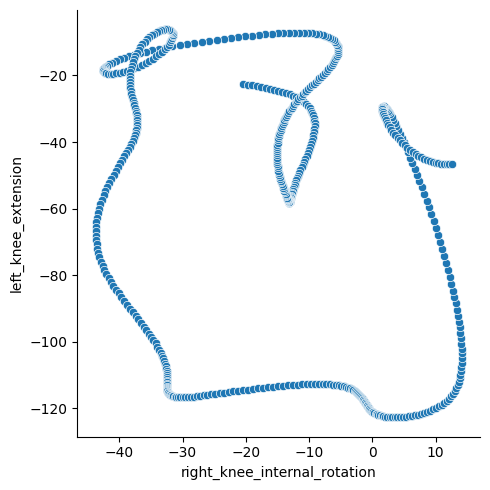

In [155]:
sns.relplot(data=merged_df2, x='right_knee_internal_rotation', y='left_knee_extension')

In [116]:
max_frames3 = max(len(df3) for df3 in dataframes)

new_timebase3 = pd.Series(range(max_frames3)) / (max_frames3 -1)

In [118]:
interpolated_df3 = []
for df3 in dataframes:
    if 'time' in df3.columns and 'right_shoulder_external_rotation' in df3.columns:
        time_column = df3['time']
        external_rotation_column = df3['right_shoulder_external_rotation']
        normalized_time = (time_column - time_column.min()) / (time_column.max() - time_column.min())
        interpolated_external_rotation = pd.Series(external_rotation_column).interpolate(method = 'linear')

interpolated_df3.append(pd.DataFrame({'time': normalized_time, 'external_rotation': interpolated_external_rotation}))    

In [119]:
merged_df3 = pd.concat(interpolated_df3, ignore_index = True)
merged_df3

,time,external_rotation
0,0.000000,-36.807085
1,0.000824,-36.964896
2,0.001647,-37.121501
3,0.002471,-37.275711
4,0.003295,-37.426372
...,...,...
1210,0.996705,-12.434084
1211,0.997529,-12.437539
1212,0.998353,-12.443697
1213,0.999176,-12.451678


In [122]:
x=0
y=199
merged_df3.loc[x:y]
merged_df3.loc[x:y].index
merged_df3.drop(merged_df3.loc[x:y].index, inplace=True)

x=571
y=1216
merged_df3.loc[x:y]
merged_df3.loc[x:y].index
merged_df3.drop(merged_df3.loc[x:y].index, inplace=True)

In [123]:
from sklearn.preprocessing import MinMaxScaler

normalized_df3 = merged_df3.copy()
  
column = 'time'
normalized_df3[column] = MinMaxScaler().fit_transform(np.array(normalized_df3[column]).reshape(-1,1))
   
display(normalized_df3)                                                                                                                                                                                                                                           

,time,external_rotation
200,0.000000,-43.896745
201,0.002703,-43.937791
202,0.005405,-43.976593
203,0.008108,-44.013018
204,0.010811,-44.046980
...,...,...
566,0.989189,-31.631663
567,0.991892,-32.462647
568,0.994595,-33.238526
569,0.997297,-33.945999


In [126]:
normalized_df3.to_csv('normalized_df3.csv')

In [124]:
average_external_rotation = normalized_df3.groupby('time')['external_rotation'].mean()

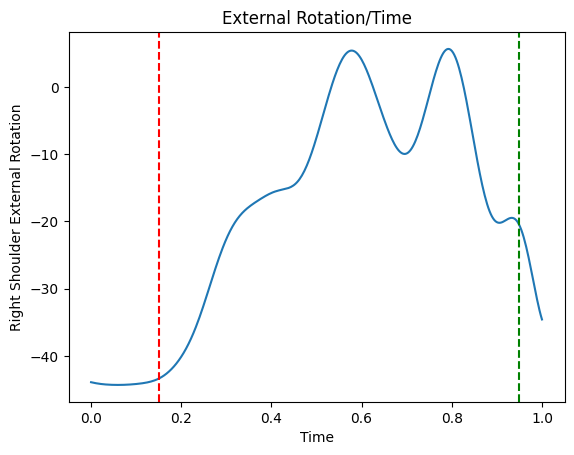

In [125]:
plt.plot(average_external_rotation.index, average_external_rotation.values)

plt.axvline(x = 0.15, color = 'red', linestyle = '--', label = 'Foot Plant')
plt.axvline(x = 0.95, color = 'green', linestyle = '--', label = 'Ball Release')
plt.xlabel('Time')
plt.ylabel('Right Shoulder External Rotation')
plt.title('External Rotation/Time')
plt.show()

In [127]:
max_frames4 = max(len(df4) for df4 in dataframes)

new_timebase4 = pd.Series(range(max_frames4)) / (max_frames4 -1)

In [131]:
interpolated_df4 = []
for df4 in dataframes:
    if 'right_shoulder_jc_3d_x' in df4.columns and 'right_shoulder_jc_3d_y' in df4.columns and 'pelvis_3d_x' in df4.columns and 'pelvis_3d_y' in df4.columns:
        shoulder_x_column = df4['right_shoulder_jc_3d_x']
        shoulder_y_column = df4['right_shoulder_jc_3d_y']
        pelvis_x_column = df4['pelvis_3d_x']
        pelvis_y_column = df4['pelvis_3d_y']
        interpolated_shoulder_x = pd.Series(shoulder_x_column).interpolate(method = 'linear')
        interpolated_shoulder_y = pd.Series(shoulder_y_column).interpolate(method = 'linear')
        interpolated_pelvis_x = pd.Series(pelvis_x_column).interpolate(method = 'linear')
        interpolated_pelvis_y = pd.Series(pelvis_y_column).interpolate(method = 'linear')
interpolated_df4.append(pd.DataFrame({'right_shoulder_jc_3d_x': interpolated_shoulder_x, 'right_shoulder_jc_3d_y': interpolated_shoulder_x, 'pelvis_3d_x': interpolated_pelvis_x, 'pelvis_3d_y': interpolated_pelvis_y}))

In [132]:
merged_df4 = pd.concat(interpolated_df4, ignore_index = True)
merged_df4

,right_shoulder_jc_3d_x,right_shoulder_jc_3d_y,pelvis_3d_x,pelvis_3d_y
0,-0.159631,-0.159631,-0.259583,0.059883
1,-0.159472,-0.159472,-0.259310,0.060165
2,-0.159314,-0.159314,-0.259040,0.060446
3,-0.159160,-0.159160,-0.258777,0.060725
4,-0.159010,-0.159010,-0.258524,0.061002
...,...,...,...,...
1210,0.659367,0.659367,0.569254,-0.068556
1211,0.661182,0.661182,0.571376,-0.068277
1212,0.662994,0.662994,0.573494,-0.067996
1213,0.664802,0.664802,0.575607,-0.067713


In [133]:
x=0
y=199
merged_df4.loc[x:y]
merged_df4.loc[x:y].index
merged_df4.drop(merged_df4.loc[x:y].index, inplace=True)

x=571
y=1216
merged_df4.loc[x:y]
merged_df4.loc[x:y].index
merged_df4.drop(merged_df4.loc[x:y].index, inplace=True)

In [135]:
merged_df4.to_csv('merged_df4.csv')

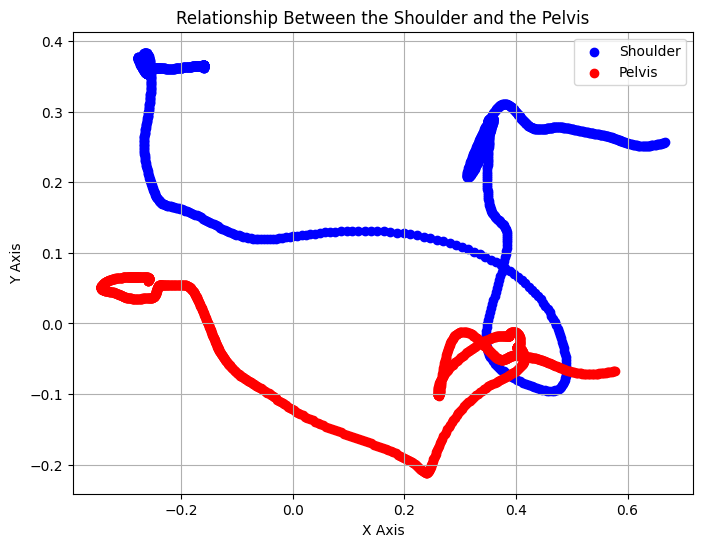

In [148]:
plt.figure(figsize=(8, 6))
plt.scatter(df['right_shoulder_jc_3d_x'], df['right_shoulder_jc_3d_y'], color='blue', label='Shoulder')
plt.scatter(df['pelvis_3d_x'], df['pelvis_3d_y'], color='red', label='Pelvis')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title('Relationship Between the Shoulder and the Pelvis')
plt.legend()
plt.grid(True)
plt.show()                                                                             